# Data analysis

In [1]:
import pandas as pd 
import seaborn as sns 
from matplotlib import pyplot as plt 

In [2]:
stats = ['count', 'mean', 'p10', 'p25', 'p50', 'p75', 'p90']

In [3]:
owner = dict()
renter = dict() 
full = dict() 

for stat in stats: 
    owner[stat]  = pd.read_csv(f'moments/{stat}_by_age_owner.txt', index_col='fam_age')
    renter[stat] = pd.read_csv(f'moments/{stat}_by_age_renter.txt', index_col='fam_age')
    full[stat]   = pd.read_csv(f'moments/{stat}_by_age_all.txt', index_col='fam_age')

# Some nice plots

Sample selection: 
* age $\in [25; 75]$, income $\in [10; 1e7]$, LTV either missing or $< 500$, year == 2015. 

In [4]:
N = full['count'].inc.sum()
print(f'Dataset based on {N} households satisfying sample criteria. ')

Dataset based on 958940.0 households satisfying sample criteria. 


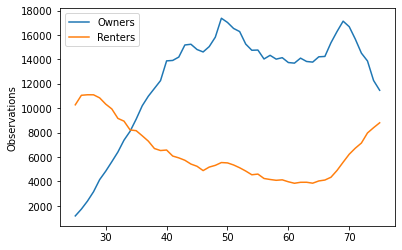

In [5]:
plt.plot(owner ['count'].inc, label='Owners'); 
plt.plot(renter['count'].inc, label='Renters'); 
plt.legend(); plt.ylabel('Observations'); 

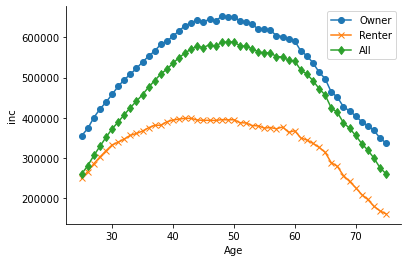

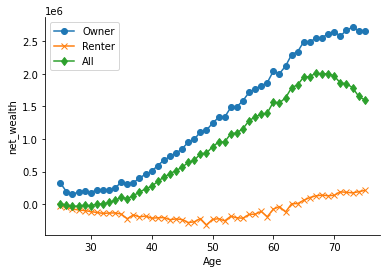

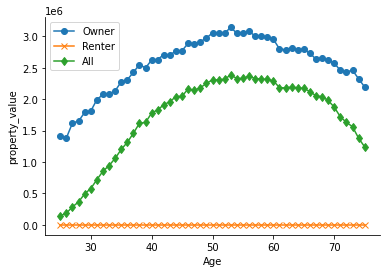

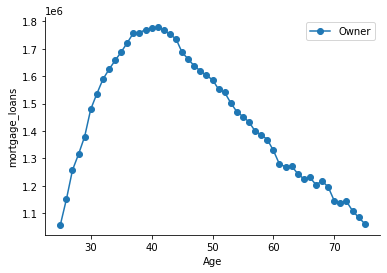

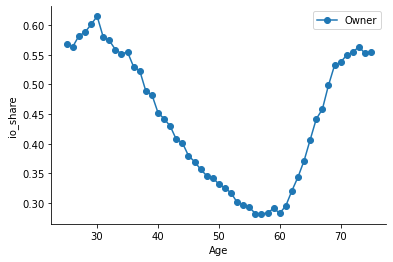

In [6]:
stat = 'mean' # can be either: mean, count, p10, p25, p50, p75, p90
for var in ['inc', 'net_wealth', 'property_value', 'mortgage_loans', 'io_share']: 
    for df,lab,m in zip([owner[stat], renter[stat], full[stat]], 
                      ['Owner', 'Renter', 'All'],
                      ['o', 'x', 'd']): 
        if var in df.columns: 
            plt.plot(df[var], marker=m, label=lab)
    plt.legend(); plt.ylabel(var); plt.xlabel('Age')
    sns.despine()
    plt.show()